# Parte 1
### Entender el problema.
En la parte uno se nos indica que se utilizar´a el modelo de Isisng-1D que utilice el algorítmo de Metropólis para simular el comportamiento magnetico de un material para ello primero se crearan tres arreglos de espines, uno con los espines hacia arriba, otro con los espines hacia abajo y por ultimo un arreglo de espines calientes, los cuales se les graficar´a el dominio con el objetivo de observar y analizar los resultados ,si el sistema tiende al equilibrio y es independiente del arreglo inicial de espines que se utilice.


### Configurar el plan
Se procede a realizar el plan a seguir durante la programación: primero se crean los arreglos de espinesiniciales, uno con todos los espines positivos, otro con los espines negativos y por último un arreglo de espines aleatorios, se guarda este arreglo en un otro arreglo que guardara todos los cambios que se hagan, se procede a calcular la energía inicial del sistema para después modificar un valor del arreglo con su negativo, este espin se elige de manera aleatoria y se somete a una probabilidad de aceptación, pero para ello se debe calcular la energía final , calcular el la diferencia de energía y con ello calcular la porbabiliad de aceptacion a la cual se someterá de manera aleatoria si se acepta o no el cambio.

Paso siguiente es guardar el arreglo resultantes, modificado o no, y se guarda en el arreglo que almacenará todos los estados.Con esto se planea tener la porgramacion que será el corazon del trabajo.

### Ejecutar el plan

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import e

In [7]:
#Calculo de la energía del sistemas para un arreglo
def Calc_energia(valorJ,arreglo_espines):
    """
    Función que calcula la energia de un arreglo de espines
    
    Parámetros de la función:
    -----------------------------
    valorJ:Valor del comportamiento ferromagético
    arreglo_espines:Arreglo de espines del estado actual del sistema
    
    Salida de la funcion
    -----------------------------
    :valor de la energia del arreglo de espines
    
    """
    valor_energia=0
    #calculo de la energía
    for i in range(-1, len(arreglo_espines)-1):
        valor_energia+=arreglo_espines[i]*arreglo_espines[i+1]
        
    return(-valorJ * valor_energia)

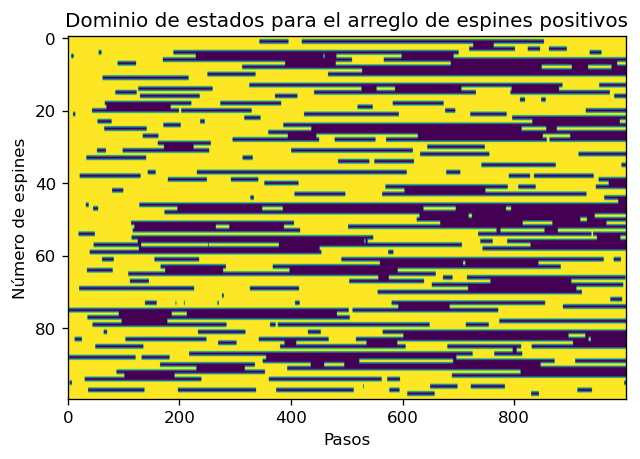

In [8]:
#se definen las constantes dadas por el problema
J=1
kbT=1
nEspines=100
nPasos=1000
#Se inica el arreglo de N entradas

#Arreglo de espines viendo hacia arriba +1/2
espines_arriba = np.ones(100)*(1/2)
#Arreglo de espines viendo hacia abajo -1/2
espines_abajo = np.ones(100)*(-1/2)
#Arreglo de espines calientes
valoresespin = np.array([-1/2,1/2]) #array con los posibles valores de s_i
espines_calientes = np.random.choice(valoresespin,nEspines)# se llena el array con variables aleatorias de de s_i

#se define el array que guardara los estados
coleccion_espines=[]


def Calc_coleccion(nEspines,nPasos,arreglo_espines_inicial):
    """
    funcion que calcula el arreglo de datos para la grafica
    Parámetros de la función:
    -----------------------------
    nEspines:Numero de cantidad de espines que puede tener el array
    nPasos:cantidad de veces que se repetira la eleccion de un spin aleatorio y se sometera a P_a
    arreglo_espines_inicial:estado incial de lo los espines
    
    Salida de la función
    -----------------------------
    arrelgo_total
    """
    #se guarda el estado inicial de espines
    coleccion_espines = [arreglo_espines_inicial]
    
    #for que llenara el arreglo total
    for i in range(0,nPasos-1):
        #caculo de energia inicial
        energia_inicial=Calc_energia(J,arreglo_espines_inicial)

        #se procede a elegir un spin aleatorio
        espin_elegido=np.random.randint(0,99)
        #se cambia el valor del spin elegido
        arreglo_espines_inicial[espin_elegido] = -arreglo_espines_inicial[espin_elegido]


        #calculo de energía final
        energia_final=Calc_energia(J,arreglo_espines_inicial)

        #Calculo de la diferencia de la energía
        delta_e=energia_final-energia_inicial

        #Se procede a realizar el porceso de probabilidad de aceptación
        #calculo de la probabilidad de aceptación
        p_a=np.exp((-delta_e*1/kbT))
        
        if delta_e < 0:# se acepta el cambio y se guarda el estado
            coleccion_espines = np.append(coleccion_espines,[arreglo_espines_inicial],0)
            
        else:
            if p_a < np.random.random():#se acepta el cambio y se guarda el estado
                coleccion_espines = np.append(coleccion_espines,[arreglo_espines_inicial],0)
                
            else:#se rechasa el cambio y se vuelve el la configuracion a su estado incial:
                #se cambia el valor del spin elegido
                arreglo_espines_inicial[espin_elegido]=-arreglo_espines_inicial[espin_elegido]
                coleccion_espines = np.append(coleccion_espines,[arreglo_espines_inicial],0)

    return(coleccion_espines)

array_T=Calc_coleccion(nEspines,nPasos,espines_arriba)

fig, ax = plt.subplots(dpi=120)
ax.imshow(np.transpose(array_T), aspect="auto")
ax.set_title('Dominio de estados para el arreglo de espines positivos')
ax.set_xlabel('Pasos')
ax.set_ylabel("Número de espines")
plt.show()

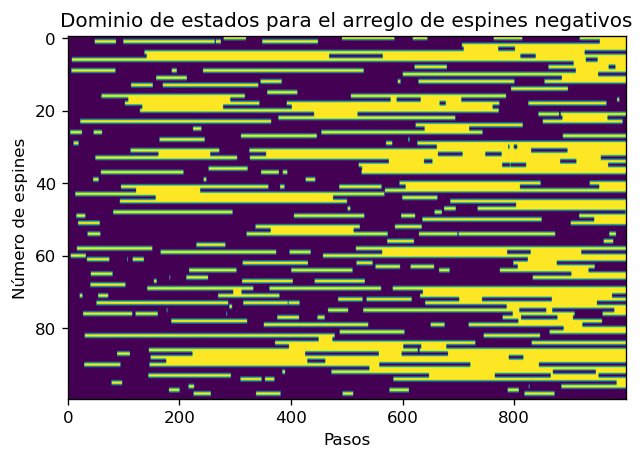

In [9]:
espines_abajo = np.ones(100)*(-1/2)
array_T=Calc_coleccion(nEspines,nPasos,espines_abajo)

fig, ax = plt.subplots(dpi=120)
ax.imshow(np.transpose(array_T), aspect="auto")
ax.set_title('Dominio de estados para el arreglo de espines negativos')
ax.set_xlabel('Pasos')
ax.set_ylabel("Número de espines")
plt.show()

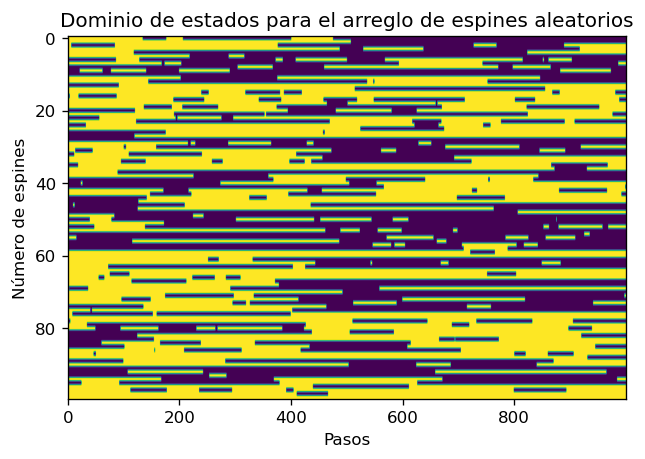

In [10]:
valoresespin = np.array([-1/2,1/2])
espines_calientes = np.random.choice(valoresespin,nEspines)
array_T=Calc_coleccion(nEspines,nPasos,espines_arriba)

fig, ax = plt.subplots(dpi=120)
ax.imshow(np.transpose(array_T), aspect="auto")
ax.set_title('Dominio de estados para el arreglo de espines aleatorios')
ax.set_xlabel('Pasos')
ax.set_ylabel("Número de espines")
plt.show()

Basado en las graficas se podría entender que el sistema tiende al equilibrio sin importar la configuracion inicial de los espines ya que segun las graficas se tiende a un sistema donde la diferencia de energias tiende a cero confrome avanzan los pasos.


Basado en las graficas se podr´ıa entender que el sistema tiende al equiibrio sin importar la configuracion inicial de los espines , eso es citado en el

### 1.4 Mirar hacia atrás

Se presentaron varios porblemas, primero se presento el reto de entender la teoría mas a fondos, duespués durante la programación se fue utilizo la consulta para entender como debia dar la graficas del dominio y con ello tener una diea de que se estaba realiznado incorrrectamente, durante la programacion surgío el problema de que la variable encargada de guaradar todos los estados de espines, era capaz de guardarlo pero siempre ajustaba en un valor el estado inicial , por ejemplo, en donde se iniciaba conun arreglo de espines hacia arriba, todos positivos, se invertía el valor de uno de ellos y se guardaba enla posición inicial a pesar de que el codigo indica que se guarde sin el ajuste.

# Parte 2

### 1 Entender el problema

Ya con el modelo de Ising 1D programado se nos indica modifical laa progamación realizada en la parte 1 para que calcule la energía interna y la magnetizacion del sistema, se volveran a usar las tres configuraciones inicales anteriores, arreglo de espines positivos, arreglo de espines negativos y arreglo de espines calientes o aleatorios.Despue se nos pide realizar el modelo de Ising tantas veces sea necesario para que el sistema tienda al equilibrio, lo siguiente es calcular las graficas de Energia interna, magnetizacion y calor espec´ıfico para el intervalo 0 < kbT < 5, de se generar´an 9 graficas.
Posterios se indica que se debe comparar los resultados con als graficas del libro en la seccion 15.3.1 con ello realizar un análisis.


#### Soluciones analiticas a utilizar
###### Energia interna

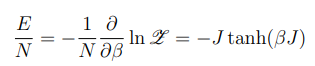

###### Calor especifico

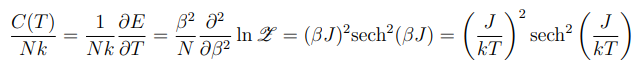

###### Magnetizacion

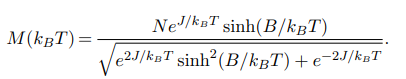


###  Configurar el plan

Se utilizar como base las funciones creadas duarnte la realización de la parte 1 del trabajo, se modifica para que calculen la energia interna y la magnetización, se tantea la cantidad de pasos necesarias para que el sistema en las graficas tienda al equilibrio, se nos sugiere que para disminuir las fluctuaciones se realice 20 simulaciones para un mismo valor de temperatura posterior a eso se calcular el promedio de las variables de energia y magnetizacion para una temperatura, se correrá la progrmación las veces
necesarias para cumplir con las indicaciones de obtener 9 graficas en el intervalo de 0 < kbT < 5, todo estas graficas se superpondran sobre las graficas anal´ıticas del libro para poder analizarlas.


###  Ejecutar el plan
A continuación la programación realizada

In [11]:
def Calc_coleccionMOD(nEspines,nPasos,arreglo_espines_inicial):
    """
    funcion que calcula el arreglo de datos para la grafica
    Parámetros de la función:
    -----------------------------
    nEspines:Numero de cantidad de espines que puede tener el array
    nPasos:cantidad de veces que se repetira la eleccion de un spin aleatorio y se sometera a P_a
    arreglo_espines_inicial:estado incial de lo los espines
    
    Salida de la función
    -----------------------------
    arrelgo_total
    """
    #se guarda el estado inicial de espines
    coleccion_espines = [arreglo_espines_inicial]
    coleccion_energias = []
    #for que llenara el arreglo total
    for i in range(0,nPasos-1):
        #caculo de energia inicial
        energia_inicial=Calc_energia(J,arreglo_espines_inicial)
        coleccion_energias = np.append(coleccion_energias,[energia_inicial],0)
        
        #se procede a elegir un spin aleatorio
        espin_elegido=np.random.randint(0,99)
        #se cambia el valor del spin elegido
        arreglo_espines_inicial[espin_elegido] = -arreglo_espines_inicial[espin_elegido]

        #calculo de energía final
        energia_final=Calc_energia(J,arreglo_espines_inicial)
        #se anade el dato de energia final a la coleccion de energias
        coleccion_energias = np.append(coleccion_energias,[energia_final],0)
        
        #Calculo de la diferencia de la energía
        delta_e=energia_final-energia_inicial

        #Se procede a realizar el porceso de probabilidad de aceptación
        #calculo de la probabilidad de aceptación
        p_a=np.exp((-delta_e*1/kbT))
        
        if delta_e < 0:# se acepta el cambio y se guarda el estado
            coleccion_espines = np.append(coleccion_espines,[arreglo_espines_inicial],0)
            
        else:
            if p_a < np.random.random():#se acepta el cambio y se guarda el estado
                coleccion_espines = np.append(coleccion_espines,[arreglo_espines_inicial],0)
                
            else:#se rechasa el cambio y se vuelve el la configuracion a su estado incial:
                #se cambia el valor del spin elegido
                arreglo_espines_inicial[espin_elegido]=-arreglo_espines_inicial[espin_elegido]
                coleccion_espines = np.append(coleccion_espines,[arreglo_espines_inicial],0)
                
    return(coleccion_espines, np.sum(coleccion_energias)/nPasos, abs(np.sum(coleccion_espines)))

In [12]:
nSimulaciones = 20
listaE=[]
listaM=[]

for i in range(nSimulaciones):
    valoresespin = np.array([-1/2,1/2])
    espines_calientes = np.random.choice(valoresespin,nEspines)
    
    array_T, EnergiaInterna, Magnetizacion = Calc_coleccionMOD(nEspines,nPasos,espines_arriba)
    
    listaE = np.append(listaE,EnergiaInterna)
    listaM = np.append(listaM,Magnetizacion)

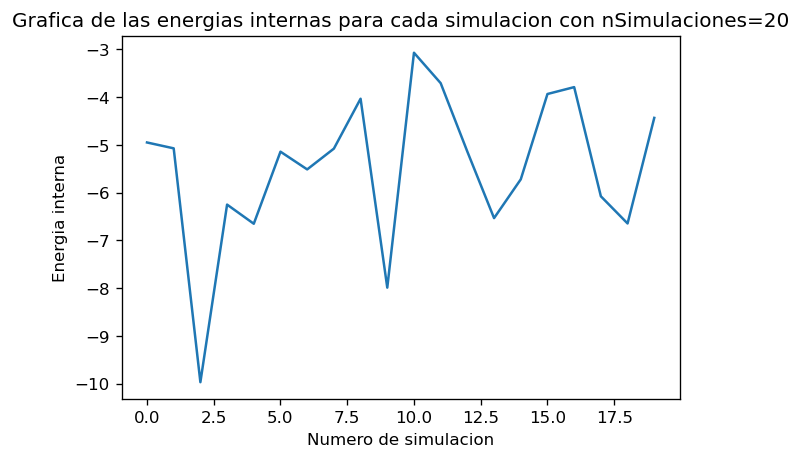

El promedio de las energias internas para KT=1 es: -5.4849


In [13]:
fig, ax = plt.subplots(dpi=120)
ax.plot(listaE)
ax.set_title('Grafica de las energias internas para cada simulacion con nSimulaciones=20')
ax.set_xlabel('Numero de simulacion')
ax.set_ylabel("Energia interna")
plt.show()
print('El promedio de las energias internas para KT=1 es:', np.sum(listaE)/nSimulaciones)

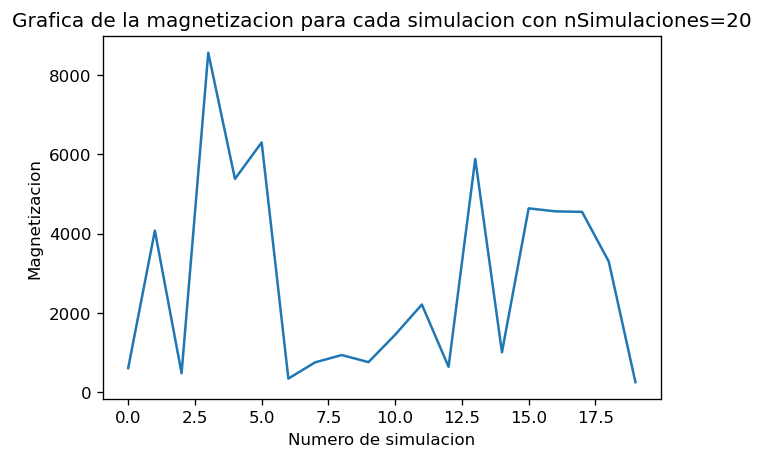

El promedio de la magnetizacion para KT=1 es: 2835.85


In [14]:
fig, ax = plt.subplots(dpi=120)
ax.plot(listaM)
ax.set_title('Grafica de la magnetizacion para cada simulacion con nSimulaciones=20')
ax.set_xlabel('Numero de simulacion')
ax.set_ylabel("Magnetizacion")
plt.show()
print('El promedio de la magnetizacion para KT=1 es:', np.sum(listaM)/nSimulaciones)

### Mirar hacia atrás

Se presentaron problemas para realizar la grafica de energías en funcion del tiempo por el hecho de dar resultados inesperados, se nos presentaron dificultades para entender a qué corresponde la energía promedio ,además de ello otra difucltad fue como calcular la enrgia interna del sistema, la
magnetización y su graficación, ademas de entender cual es el promedio que define el momento en que cual se debe calcular.

### Link de la programación en Drive

https://github.com/Linoacetyd/Tarea-S13-Compu